In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import BlackBody
from astropy import units as u
from tqdm import tqdm

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 

In [16]:
T_sun = 5778 #K

Initialize a population of stars with masses $\in (0.1, 100) M_{\odot}$ 

In [17]:
masses = np.linspace(0.1, 100, 1000)

Identify an intersting range of wavelengths

In [18]:
wav = np.arange(1000, 9000) * u.AA
wav

<Quantity [1000., 1001., 1002., ..., 8997., 8998., 8999.] Angstrom>

Build a simple **Single Stellar Population** (**SSP**) model, remembering that:

$$\dfrac{L_{star}}{L_{\odot}} \simeq \left(\dfrac{M_{star}}{M_{\odot}}\right)^{3.5}$$

$$\dfrac{\Delta t_{star}}{\Delta t_{\odot}} \simeq \dfrac{M_{star}}{L_{star}} \simeq \left(M_{star}\right)^{-2.5} \:\: \Rightarrow \:\: \Delta t_{star} \simeq 10 \, Gyr \times \left(M_{star}\right)^{-2.5}$$

$$\dfrac{R_{star}}{R_{\odot}} \simeq \left(\dfrac{M_{star}}{M_{\odot}}\right)^{\frac{n-1}{n+3}}$$

$$L_{star} = 4 \pi R_{star}^2 \sigma T_{eff, star}^4 \:\: \Rightarrow \:\: \dfrac{T_{eff,star}}{T_{eff, \odot}} \simeq \left(\dfrac{L_{star}}{R_{star}^2}\dfrac{R_{\odot}^2}{L_{\odot}}\right)^{\frac{1}{4}}$$

In [19]:
def SSP(wav, SSP_age):
    
    # Initialize a null flux-array of type BlackBody by setting 'scale=0' 
    totflux = BlackBody(temperature=1000*u.K, scale=0.*u.erg/(u.cm**2*u.AA*u.s*u.sr))(wav)
    
    for i in tqdm(range(len(masses))):
        # Compute the luminosity of the star in solar luminosities
        L = masses[i]**3.5
        
        # Compute the lifetime of the star in Gigayears
        lifetime = 10 * masses[i]/L
        
        # Discard the current star if its lifetime is smaller than the age of the galaxy
        if SSP_age <= lifetime:
            
            # Distinguish between p-p chain and CNO cycle
            if masses[i] < 2 : n = 4
            else : n = 18
            
            # Compute the radius of the star in solar radii
            radius = masses[i]**((n-1)/(n+3))
            
            # Compute the effective temperature of the star in Kelvin
            T = T_sun * (L/(radius**2))**0.25
            
            # Take into account the Initial Mass Function
            imf = masses[i]**(-2.35)
            
            # Compute the black body spectrum per unit of Angstrom and add it to the total flux
            bb = BlackBody(temperature=T*u.K, scale=1.*u.erg/(u.cm**2 * u.AA * u.s * u.sr))
            totflux = totflux + imf*L*bb(wav)/bb.bolometric_flux.value
            
    return totflux       

Plot the **Spectral Energy Distribution** (**SED**)

In [20]:
def plotSSP(wav, SSP_age, normwav=5500*u.AA, lstyle="-", col="blue"):
    totflux = SSP(wav, SSP_age)
    
    # Normalize at 5500AA
    totflux_norm = totflux/totflux[wav==normwav]
    
    plt.plot(wav, totflux_norm, label="age="+str(SSP_age) +"Gyr", linestyle=lstyle, color=col)
    return

100%|██████████| 1000/1000 [00:00<00:00, 36757.96it/s]


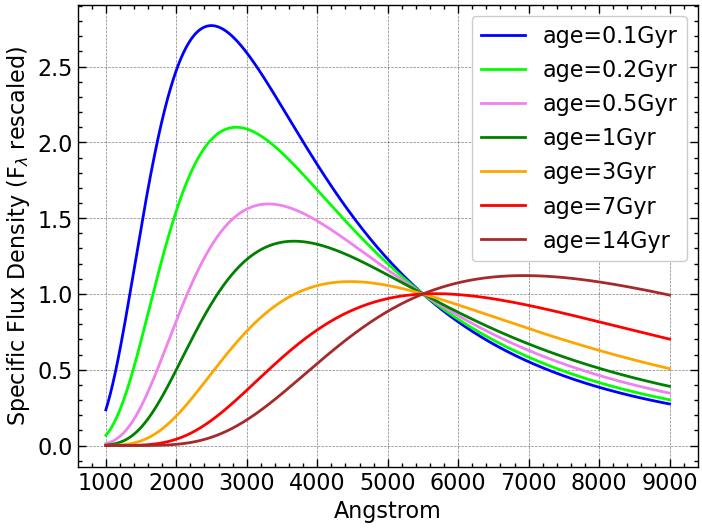

In [21]:
plotSSP(wav, SSP_age=0.1, col="blue")
plotSSP(wav, SSP_age=0.2, col="lime")
plotSSP(wav, SSP_age=0.5, col="violet")
plotSSP(wav, SSP_age=1, col="green")
plotSSP(wav, SSP_age=3, col="orange")
plotSSP(wav, SSP_age=7, col="red")
plotSSP(wav, SSP_age=14, col="brown")

plt.xlabel( "Angstrom" )
plt.ylabel( "Specific Flux Density (F$_{\lambda}$ rescaled)" )
plt.legend (loc="upper right" )